In [ ]:
#Connect to google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Import useful packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Grammys/Main CSV data.csv.csv')
data1.head()

,Albums,Artist(s),Year,Genres BIN,GENDERS,Age of win,Critic score,Userscore,Ethnicity,Win
0,The Music from Peter Gunn,Henry Mancini,1959,0,0,35,69,7.0,1.0,True
1,Come Fly with Me,Frank Sinatra,1959,0,0,44,84,9.1,1.0,False
2,Ella Fitzgerald Sings the Irving Berlin Songbook,Ella Fitzgerald,1959,1,1,42,84,9.1,1.0,False
3,Frank Sinatra Sings for Only the Lonely,Frank Sinatra,1959,0,0,44,84,8.2,1.0,False
4,"Tchaikovsky: Concerto No. 1, In B-Flat Minor, ...",Van Cliburn,1959,0,0,25,69,7.0,1.0,False


In [ ]:
data1.tail()

,Albums,Artist(s),Year,Genres BIN,GENDERS,Age of win,Critic score,Userscore,Ethnicity,Win
316,Norman Fucking Rockwell!,Lana Del Rey,2020,1,1,35,87,8.2,1.0,False
317,7 (Lil Nas X EP),Lil Nas X,2020,0,0,21,56,8.2,1.0,False
318,"Thank U, Next",Ariana Grande,2020,1,1,27,82,7.0,1.0,False
319,Folklore,Taylor Swift,2021,1,1,32,88,8.2,1.0,True
320,Black Pumas (Deluxe Edition),Black Pumas,2021,0,0,79,84,9.5,1.0,False


In [ ]:
# Delete the last 11 rows
data = data1.iloc[:-11]

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# The dataset should have a column named 'Userscore'
dataset = pd.read_csv('/content/drive/MyDrive/Grammys/Main CSV data.csv.csv')

# Calculate the mean of the 'Userscore' column
mean_userscore = dataset['Userscore'].mean()

# Print or use the mean value
print(f"Mean Userscore: {mean_userscore}")

Mean Userscore: 7.909345794392523


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Fill NaN values in the 'Userscore' column with 7.9
data['Userscore'].fillna(7.9, inplace=True)

# If you want to fill NaN values for the entire DataFrame, you can use:
# data.fillna(7.9, inplace=True)


<ipython-input-7-8efe5eb735a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Userscore'].fillna(7.9, inplace=True)


In [ ]:
data.dtypes

Albums           object
Artist(s)        object
Year              int64
Genres BIN        int64
GENDERS           int64
Age of win        int64
Critic score      int64
Userscore       float64
Ethnicity       float64
Win                bool
dtype: object

In [ ]:
#Summary of data
data.describe()

,Year,Genres BIN,GENDERS,Age of win,Critic score,Userscore,Ethnicity
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.0
mean,1988.990323,0.393548,0.393548,34.474194,76.977419,7.903548,1.0
std,17.871075,0.643582,0.643582,9.029132,7.793210,0.788481,0.0
min,1959.000000,0.000000,0.000000,21.000000,65.000000,5.600000,1.0
25%,1973.250000,0.000000,0.000000,28.000000,69.000000,7.000000,1.0
50%,1989.000000,0.000000,0.000000,32.000000,78.000000,8.200000,1.0
75%,2004.000000,1.000000,1.000000,39.000000,84.000000,8.200000,1.0
max,2019.000000,2.000000,2.000000,69.000000,99.000000,9.500000,1.0


<ipython-input-10-cef21acf21a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Artist(s)'] = data['Artist(s)'].astype(str)


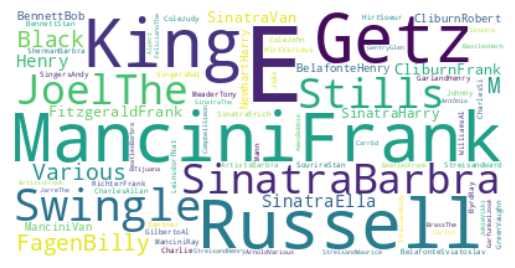

In [ ]:
#Let's build a word cloud of Artists
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Assuming 'Artist(s)' is the column containing artist names
data['Artist(s)'] = data['Artist(s)'].astype(str)

# Generate the word cloud
Cloud_Grammy_best_album = WordCloud(background_color='white').generate(''.join(data['Artist(s)']))

# Display the word cloud
plt.imshow(Cloud_Grammy_best_album, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Calculate the percentage of each gender
gender_percentage = data['GENDERS'].value_counts(normalize=True) * 100

# Display the result
print(gender_percentage)

0    69.354839
1    21.935484
2     8.709677
Name: GENDERS, dtype: float64


In [ ]:
import pandas as pd
# Define a mapping for the Ethnicity values
ethnicity_mapping = {
    'black': 0,
    'white': 1,
    'mixte': 2,
    'asian': 3,
    'latin': 4,
    'polynesian': 5
}

# Update the values in the 'Ethnicity' column based on the mapping
data['Ethnicity'] = data['Ethnicity'].map(ethnicity_mapping)
data['Ethnicity'].fillna(1, inplace=True)
# Save the updated DataFrame back to the CSV file
data.to_csv('/content/drive/MyDrive/Grammys/Main CSV data.csv.csv', index=False)

# Print the updated DataFrame
print(data)

                                                Albums  \
0                            The Music from Peter Gunn   
1                                     Come Fly with Me   
2     Ella Fitzgerald Sings the Irving Berlin Songbook   
3              Frank Sinatra Sings for Only the Lonely   
4    Tchaikovsky: Concerto No. 1, In B-Flat Minor, ...   
..                                                 ...   
305                                         These Days   
306                                       Raising Sand   
307                                        In Rainbows   
308                                     Tha Carter III   
309          Viva la Vida or Death and All His Friends   

                        Artist(s)  Year  Genres BIN  GENDERS  Age of win  \
0                   Henry Mancini  1959           0        0          35   
1                   Frank Sinatra  1959           0        0          44   
2                 Ella Fitzgerald  1959           1        1          42   

<ipython-input-12-adcabee829ec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ethnicity'] = data['Ethnicity'].map(ethnicity_mapping)
<ipython-input-12-adcabee829ec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ethnicity'].fillna(1, inplace=True)


In [ ]:
import pandas as pd

# Replace 'male' with 0, 'female' with 1, and 'NB' with 2
data['GENDERS'] = data['GENDERS'].replace({'male': 0, 'female': 1, 'NB': 2})

# Fill NaN values in the 'GENDERS' column with 1
data['GENDERS'] = data['GENDERS'].fillna(1)

# Save the modified DataFrame back to the CSV file
data.to_csv('/content/drive/MyDrive/Grammys/Main CSV data.csv.csv', index=False)

<ipython-input-13-77361e8993c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENDERS'] = data['GENDERS'].replace({'male': 0, 'female': 1, 'NB': 2})
<ipython-input-13-77361e8993c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENDERS'] = data['GENDERS'].fillna(1)


In [ ]:
# Convert True to 1 and False to 0
data['Win'] = data['Win'].map({True: 1, False: 0, np.nan: np.nan})

# Display the updated DataFrame
print(data)

                                                Albums  \
0                            The Music from Peter Gunn   
1                                     Come Fly with Me   
2     Ella Fitzgerald Sings the Irving Berlin Songbook   
3              Frank Sinatra Sings for Only the Lonely   
4    Tchaikovsky: Concerto No. 1, In B-Flat Minor, ...   
..                                                 ...   
305                                         These Days   
306                                       Raising Sand   
307                                        In Rainbows   
308                                     Tha Carter III   
309          Viva la Vida or Death and All His Friends   

                        Artist(s)  Year  Genres BIN  GENDERS  Age of win  \
0                   Henry Mancini  1959           0        0          35   
1                   Frank Sinatra  1959           0        0          44   
2                 Ella Fitzgerald  1959           1        1          42   

<ipython-input-14-af03c878b49d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Win'] = data['Win'].map({True: 1, False: 0, np.nan: np.nan})


In [ ]:
#check if missing data
data.isnull().sum()

Albums          0
Artist(s)       0
Year            0
Genres BIN      0
GENDERS         0
Age of win      0
Critic score    0
Userscore       0
Ethnicity       0
Win             0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have already preprocessed the 'GENDERS' column as mentioned in the previous responses

# Split the dataset into labels and attributes
X = data[['Age of win', 'GENDERS', 'Ethnicity', 'Critic score', 'Userscore']]
Y = data['Win']

# Let's divide the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Standardize the features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Logistic Regression
logit_model = LogisticRegression(random_state=0)
logit_model.fit(X_train_scaled, Y_train)

# Predict probabilities on the test set
probabilities = logit_model.predict_proba(X_test_scaled)[:, 1]

# Set a threshold (you can adjust this based on your requirements)
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
predictions = (probabilities > threshold).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Find the index of the most likely winner
most_likely_winner_index = probabilities.argmax()

# Extract the corresponding row from the test set
most_likely_winner_data = X_test.iloc[[most_likely_winner_index]]
print('Most Likely Winner Data:')
print(most_likely_winner_data)


Accuracy: 88.46%
Most Likely Winner Data:
     Age of win  GENDERS  Ethnicity  Critic score  Userscore
116          66        1        1.0            69        7.0


In [ ]:
import pandas as pd
from scipy.spatial import distance

# Load the CSV file and preprocess 'GENDERS' as needed
csv_file_path = '/content/drive/MyDrive/Grammys/TEstGrammysfff.csv'
csv_data = pd.read_csv(csv_file_path)

# Preprocess 'GENDERS' column if not done previously
# csv_data['GENDERS'] = csv_data['GENDERS'].replace({'male': 0, 'female': 1, 'NB': 2})

# Most Likely Winner Data
most_likely_winner_data = {'Age of win': 38, 'GENDERS': 0, 'Ethnicity': 1.0, 'Critic score': 84, 'Userscore': 5.6}

# Calculate Euclidean distances between each row in the CSV file and the Most Likely Winner Data
csv_data['Distance'] = csv_data.apply(lambda row: distance.euclidean(
    [row['Age of win'], row['GENDERS'], row['Ethnicity'], row['Critic score'], row['Userscore']],
    [most_likely_winner_data['Age of win'], most_likely_winner_data['GENDERS'], most_likely_winner_data['Ethnicity'], most_likely_winner_data['Critic score'], most_likely_winner_data['Userscore']]
), axis=1)

# Find the row with the smallest distance (most similar)
most_similar_row = csv_data.loc[csv_data['Distance'].idxmin()]

# Display the most similar row
print('Most Similar Row:')
print(most_similar_row)

Most Similar Row:
Age of win      35.000000
GENDERS          1.000000
Ethnicity        0.000000
Critic score    86.000000
Userscore        7.000000
Distance         4.118252
Name: 6, dtype: float64


In [ ]:
import pandas as pd
from scipy.spatial import distance

# Load the CSV files
most_likely_winner_data = {'Age of win': 38, 'GENDERS': 0, 'Ethnicity': 1.0, 'Critic score': 84, 'Userscore': 5.6}
csv_file_path = '/content/drive/MyDrive/Grammys/TEstGrammys SZA.csv'
additional_csv_file_path = '/content/drive/MyDrive/Grammys/TEstGrammys SZA.csv'  # Replace with the actual path

csv_data = pd.read_csv(csv_file_path)
additional_data = pd.read_csv(additional_csv_file_path)

# Preprocess 'GENDERS' column if not done previously
# csv_data['GENDERS'] = csv_data['GENDERS'].replace({'male': 0, 'female': 1, 'NB': 2})

# Calculate Euclidean distances between each row in the CSV file and the Most Likely Winner Data
csv_data['Distance'] = csv_data.apply(lambda row: distance.euclidean(
    [row['Age of win'], row['GENDERS'], row['Ethnicity'], row['Critic score'], row['Userscore']],
    [most_likely_winner_data['Age of win'], most_likely_winner_data['GENDERS'], most_likely_winner_data['Ethnicity'], most_likely_winner_data['Critic score'], most_likely_winner_data['Userscore']]
), axis=1)

# Find the row with the smallest distance (most similar)
most_similar_row = csv_data.loc[csv_data['Distance'].idxmin()]

# Extract Album and Artist(s) from the additional CSV file using the index of the most similar row
additional_info = additional_data.loc[most_similar_row.name, ['Album', 'Artist(s)']]

# Display Album and Artist(s)
print('Most Similar Album and Artist(s):')
print(additional_info)


Most Similar Album and Artist(s):
Album        SOS
Artist(s)    SZA
Name: 6, dtype: object
